In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## Question 4

Do people who travel a lot prefer beaches over mountains than those who travel less.

In [2]:
df = pd.read_csv('mountains_vs_beaches_preferences.csv')

In [3]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [5]:
# we get the median of travel frequency to split the data into two groups
median = df['Travel_Frequency'].median()
df['Travel_Frequency'] = np.where(df['Travel_Frequency'] >= median, 'frequent', 'not_frequent')

In [6]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,frequent,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,not_frequent,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,not_frequent,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,frequent,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,frequent,sunbathing,516,suburban,23,151,winter,1,1,0


In [11]:
# we get the preference column based on the median of travel frequency
travel_frequently = df[df['Travel_Frequency'] == 'frequent']['Preference']

In [12]:
travel_less_frequently = df[df['Travel_Frequency'] == 'not_frequent']['Preference']

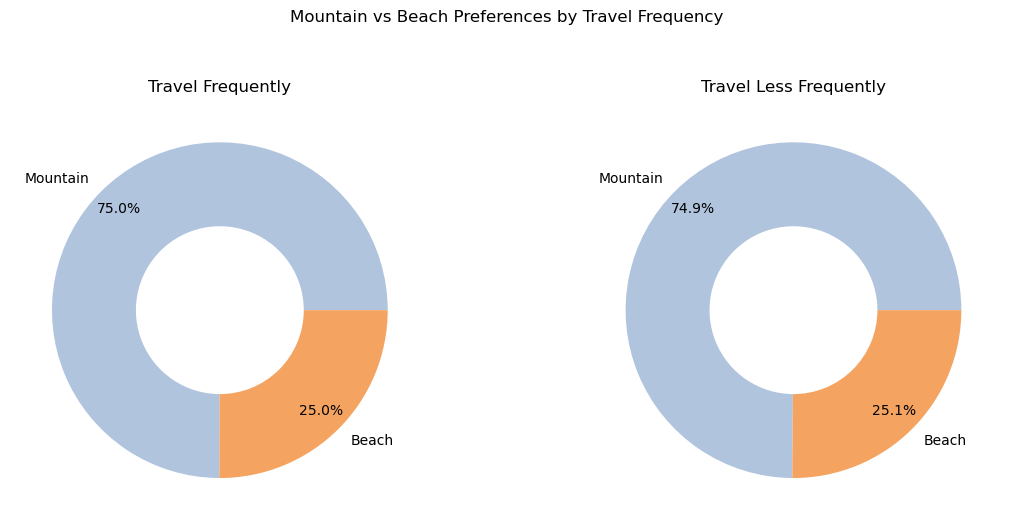

In [30]:
# Calculate the values for each group
freq_counts = df[df['Travel_Frequency'] == 'frequent']['Preference'].value_counts()
not_freq_counts = df[df['Travel_Frequency'] == 'not_frequent']['Preference'].value_counts()

# Create the figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Colors for the charts
colors = ['lightsteelblue', 'sandybrown']

# Travel Frequently donut
freq_sizes = [freq_counts.get(0, 0), freq_counts.get(1, 0)]
freq_percentages = [count/sum(freq_sizes)*100 for count in freq_sizes]
ax1.pie(freq_sizes, labels=['Mountain', 'Beach'], 
        autopct='%.1f%%',
        colors=colors, 
        radius=1, 
        pctdistance=0.85,
        wedgeprops=dict(width=0.5))
ax1.set_title('Travel Frequently')

# Travel Less Frequently donut
not_freq_sizes = [not_freq_counts.get(0, 0), not_freq_counts.get(1, 0)]
not_freq_percentages = [count/sum(not_freq_sizes)*100 for count in not_freq_sizes]
ax2.pie(not_freq_sizes, labels=['Mountain', 'Beach'], 
        autopct='%.1f%%',
        colors=colors, 
        radius=1, 
        pctdistance=0.85,
        wedgeprops=dict(width=0.5))
ax2.set_title('Travel Less Frequently')

# Add main title
plt.suptitle('Mountain vs Beach Preferences by Travel Frequency', y=1.05)

plt.tight_layout()
plt.show()

In [39]:
# Create contingency table from original data
contingency = pd.crosstab(df['Travel_Frequency'], df['Preference'])
print("\nContingency Table (Raw Counts):")
print("Columns: 0=Mountain, 1=Beach")
print(contingency)

# Run chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency)

# Print results
print("\nChi-square Test Results:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")




Contingency Table (Raw Counts):
Columns: 0=Mountain, 1=Beach
Preference            0     1
Travel_Frequency             
frequent          23562  7872
not_frequent      15734  5276

Chi-square Test Results:
Chi-square statistic: 0.0283
p-value: 0.8665
Degrees of freedom: 1


In [47]:
df = pd.read_csv('mountains_vs_beaches_preferences.csv')

In [49]:
# we get the median of travel frequency to split the data into two groups
median = df['Travel_Frequency'].median()
df['Travel_Frequency'] = np.where(df['Travel_Frequency'] >= median, 'frequent', 'not_frequent')

In [55]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education_Level', 'Preferred_Activities',
       'Vacation_Budget', 'Location', 'Proximity_to_Mountains',
       'Proximity_to_Beaches', 'Favorite_Season', 'Pets',
       'Environmental_Concerns', 'Preference',
       'Travel_Frequency_not_frequent'],
      dtype='object')

In [66]:
# run logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Use the dummy variable columns directly
X = df[['Travel_Frequency_not_frequent']]

y = df['Preference']

# Fit logistic regression
model = LogisticRegression(random_state=42, class_weight='balanced')

model.fit(X, y)

# Make predictions
y_pred = model.predict(X)
y_pred_prob = model.predict_proba(X)

# Print results
print("Model Coefficients:")
print(f"Intercept: {model.intercept_[0]:.3f}")
print(f"Travel_Frequency_frequent coefficient: {model.coef_[0][0]:.3f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred))

# Print predicted probabilities for each case
print("\nDetailed Predictions:")
results_df = pd.DataFrame({
   'Travel_Frequency': df['Travel_Frequency_not_frequent'],
   'Actual_Preference': y,
   'Predicted_Preference': y_pred,
   'Prob_Mountain': y_pred_prob[:, 0],
   'Prob_Beach': y_pred_prob[:, 1]
})
print(results_df)

# Calculate odds ratio
odds_ratio = np.exp(model.coef_[0][0])
print(f"\nOdds Ratio for Travel_Frequency_frequent: {odds_ratio:.3f}")

# Quick interpretation
print("\nInterpretation:")
print("1. Model Performance:")
print(f"  - Accuracy: {accuracy_score(y, y_pred):.3f}")

print("\n2. Probabilities by Travel Frequency:")
for freq in ['frequent', 'not_frequent']:
   mask = df['Travel_Frequency_not_frequent'] == freq
   beach_prob = y_pred_prob[mask][:, 1].mean()
   print(f"  - {freq}: {beach_prob:.3f} probability of preferring beach")
 

Model Coefficients:
Intercept: -0.001
Travel_Frequency_frequent coefficient: 0.003

Confusion Matrix:
[[23562 15734]
 [ 7872  5276]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67     39296
           1       0.25      0.40      0.31     13148

    accuracy                           0.55     52444
   macro avg       0.50      0.50      0.49     52444
weighted avg       0.62      0.55      0.58     52444


Detailed Predictions:
       Travel_Frequency  Actual_Preference  Predicted_Preference  \
0                 False                  1                     0   
1                  True                  0                     1   
2                  True                  1                     1   
3                 False                  1                     0   
4                 False                  0                     0   
...                 ...                ...                   ...   
52439            

/var/folders/dv/_l_gwqk95zdggctvnm04j3780000gn/T/ipykernel_70200/3841132931.py:54: RuntimeWarning: Mean of empty slice.
  beach_prob = y_pred_prob[mask][:, 1].mean()
/opt/anaconda3/envs/NN/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
